In [ ]:
#| hide
from GraphFormer.core import *

# GraphFormer
 
> Hybrid GNN-Transformer Architecture for Complex Relational Data: A Case Study in Educational Recommendation Systems

> GraphFormer is a work in progess...

## Introduction

In this blog post we present a novel hybrid architecture that combines Graph Neural Networks (GNNs) and Transformers to process and analyze complex relational data. This architecture is designed to capture both the intricate network structure of interconnected entities and rich feature sets with individual data points. By leveraging PyTorch Geometric for graph-based learning and PyTorch’s Transformer implementation for sequence modeling, our approach offers a flexible and powerful framework for a wide range of applications involving graph structured relational data. 


## Architecture Overview

The proposed architecture integrates Graph Neural Networks (GNNs) and Transformers to effectively process and analyze complex relational data. The GNN component, implemented using PyTorch Geometric, serves as the foundation for modeling entity relationships. It employs multiple Graph Convolutional Network (GCN) layers to learn entity embeddings, effectively capturing complex interdependencies and structural information inherent in the data. This approach allows for a compact yet comprehensive representation of intricate entity networks.


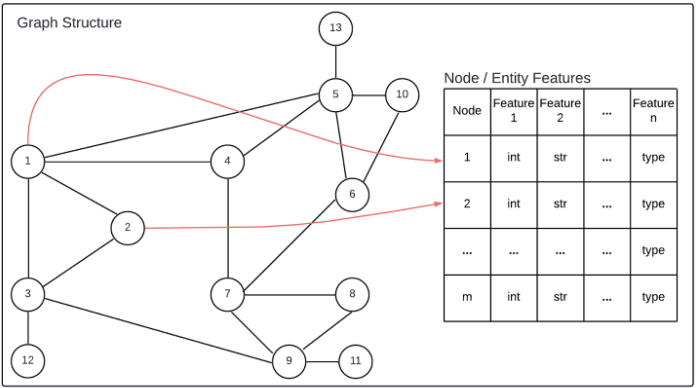

Figure 1: Representation of Graph-Structured Data as Input to the Hybrid GNN-Transformer Architecture

In conjunction with the GNN, we introduce a novel “TransformerEncoderForEntitiesAndFeatures” model. This bespoke Transformer-based component is engineered to amalgamate the learned entity embeddings with supplementary feature sets. The integration facilitates a nuanced matching between entities and external factors, thereby enhancing the model's contextual understanding and analytical capabilities.


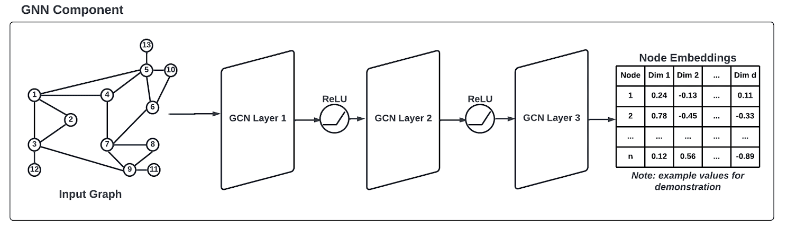

Figure 2: GNN Component of the Hybrid Architecture

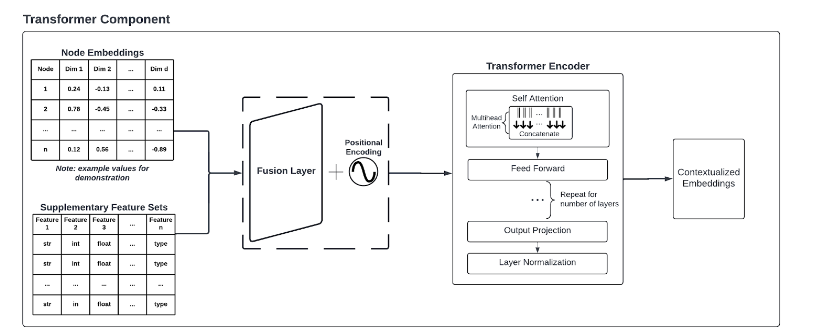

Figure 3: Transformer Component of the Hybrid Architecture

## Key Innovations

The primary innovation of this architecture lies in its dual representation learning capability. The GNN component extracts entity embeddings based on relational structure, while the Transformer integrates these embeddings with additional features. This approach yields rich, context-aware representations that encapsulate both the inherent structure of the data and the nuanced characteristics of individual entities.
Moreover, the architecture leverages the Transformer's attention mechanism to enable flexible entity-feature matching. This mechanism dynamically weights various aspects of entities and features contingent on the context, allowing for a more sophisticated and adaptive analysis. Such flexibility is desirable when dealing with complex, real-world data where the significance of different factors may vary depending on the specific context.
Lastly, the architecture demonstrates scalability to large, complex datasets. It is designed to handle a substantial number of entities and intricate relationship structures, making it particularly suitable for real-world applications involving extensive relational data. This scalability ensures the viability of our approach even as datasets grow in size and complexity, addressing a common challenge in domains dealing with relational data at scale.


## Details & Case Study


### Author’s Note
This case study is a simple demonstration of a possible use case for this architecture. The broader strokes are detailed below, but to follow along and experiment yourself, feel free to reference this GitHub Repository: `https://github.com/ethanshenley/Hybrid-GNN-Transformer-Example`


## The Datasets

To demonstrate the efficacy of our architecture, we present its application in NextGenEd, a personalized course recommendation system for educational institutions. In this context, courses serve as entities (nodes) in the graph, with prerequisites and corequisites forming the relationships (edges). Student characteristics and preferences are incorporated as additional features.

We used two data sets to demonstrate the use of this hybrid architecture. We generated a pseudo course-catalog with 100 courses to mimic the structure typically found in university curricula. This dataset comprises mixed data types, encompassing both semantic and relational information. The semantic information was used to construct the nodes, while the relational information was used to construct the edges. 


```
CRN,Code,Title,Department,Credits,Description,Level,Prerequisites,Corequisites,Topics,Required for Majors,Learning Outcomes,Average GPA,Typical Semesters Offered,Difficulty Rating,Workload Hours/Week,Typical Class Size,Online Offering Available
```
Figure 4: Dataset Schema for the Course Catalog including semantic and relational information.


``` 
69254,MATH656,"""Advanced Topics in Algebraic Geometry""",MATH,4.0,"This course delves into advanced topics in algebraic geometry, covering concepts such as schemes, cohomology, and intersection theory. Students will explore modern developments in the field and engage with challenging problems to deepen their understanding of algebraic structures and geometric properties.",600,MATH159|MATH154,,"1. Algebra
2. Calculus
3. Geometry
4. Probability and Statistics
5. Number Theory",HIST Major,"1. Solve algebraic equations and inequalities using appropriate techniques and strategies|
2. Apply principles of calculus to analyze and solve mathematical problems in various contexts|
3. Demonstrate an understanding of geometric concepts and their applications in real-world situations|
4. Analyze and interpret data using probability and statistical methods|
5. Explore and apply number theory concepts to solve mathematical problems efficiently.",2.863217500832427,Summer|Spring|Fall,4.12909614744286,12.020213472438389,52,False
```
Figure 5: Example Course from our Course Catalog


To simulate the diverse characteristics of a student population, we generated a dataset of 100 student profiles. This dataset serves to demonstrate the integration of supplementary feature sets in generating personalized recommendations. The student dataset schema (Figure 6) showcases the heterogeneous nature of student data, incorporating both categorical and continuous variables, thereby testing the architecture's capacity to process and integrate diverse data types.

```
Student ID,Name,Date of Birth,Entry Date,Expected Graduation,Major,Minor,GPA,Total Credits,Academic Standing,Gender,Ethnicity,First Generation College,High School GPA,SAT Score,ACT Score,Current Courses,Academic Plan,Study Abroad Experience,Internship Experience,Research Experience,Extracurricular Activities,Attendance Rate,Assignment Completion Rate,Preferred Learning Style,Career Goals,Tutoring Sessions,Academic Coaching Sessions,Average Study Hours/Week,Work Hours/Week
```
Figure 6: Dataset Schema for the Student Dataset

```
S548323,Sophia Rodriguez,1999-11-07,2024-08-01,2028-05-15,HIST,,2.46,85,Good Standing,Male,True,3.06,,,65260|13043|51212,64891|75519|17292|80475|33652|82386|41090|13039|63396|90434,False,False,False,,0.8341785355410825,0.9285145448540364,Auditory,"1. To become a software engineer at a top technology company
2. To pursue a career in marketing and eventually become a brand manager
3. To work in public health and contribute to improving healthcare access for underserved communities",8,4,21.914441233047334,7.836155882407471
```
Figure 6: Example Student from the Student Dataset

By employing these two interconnected datasets, we aim to evaluate the architecture's ability to effectively model complex course relationships via the GNN component and integrate diverse student attributes via the Transformer component. This experimental setup allows us to assess the architecture's performance in a somewhat-realistic educational context. 


## Model Architecture

The GNN component for modeling course relationships is implemented as follows:

In [ ]:
import torch
class CourseGNN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(CourseGNN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, num_classes)


    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return x

ModuleNotFoundError: No module named 'torch'

The Transformer-based component for student-course matching is implemented as:

In [ ]:

import torch.nn as nn
# Create Positional Encoder
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)


    def forward(self, x):
        return x + self.pe[:x.size(0)]


class TransformerEncoderForStudentAndCourses(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_layers, dropout=0.1):
        super().__init__()
        self.input_projection = nn.Linear(input_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model)
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward=4*d_model, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.output_projection = nn.Linear(d_model, d_model)
        self.layer_norm = nn.LayerNorm(d_model)


    def forward(self, src):
        src = self.input_projection(src)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src)
        output = self.output_projection(output)
        return self.layer_norm(output)

NameError: name 'nn' is not defined

Below is the training loop used to create the contextualized embeddings:


In [ ]:
input_dim = X_student_tensor.shape[1] + embeddings.shape[1]
d_model = 256  #  you can adjust this to whatever fits your data best
nhead = 8  # Number of attention heads
num_layers = 3  # Number of transformer layers
transformer_encoder = TransformerEncoderForStudentAndCourses(input_dim, d_model, nhead, num_layers)


def train_transformer_encoder():
    optimizer = torch.optim.Adam(transformer_encoder.parameters(), lr=0.001)
    criterion = nn.MSELoss()
   
    num_epochs = 100
    for epoch in range(num_epochs):
        total_loss = 0
        for i, student in enumerate(X_student_tensor):
            try:
                # Get current courses for the student
                current_courses = student_data.iloc[i]['Current Courses'].split('|')
               
                # Get average embedding of current courses
                course_indices = [course_catalog_df[course_catalog_df['Code'] == course].index[0]
                                  for course in current_courses
                                  if course in course_catalog_df['Code'].values]
                if not course_indices:
                    continue
                target_embedding = embeddings[course_indices].mean(dim=0)
               
                # Forward pass
                combined_encoding = get_student_and_course_encoding(student, target_embedding)
                loss = criterion(combined_encoding.squeeze(), target_embedding)
               
                # Backward pass and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            except Exception as e:
                print(f"Error processing student {i}: {str(e)}")
                continue
       
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}')


NameError: name 'X_student_tensor' is not defined

## Case Study Results:

In the NextGenEd case study, our architecture demonstrated superior performance in generating personalized course recommendations compared to traditional methods. The system successfully captured complex course interdependencies while accounting for individual student characteristics, leading to more relevant and contextualized recommendations.

A key feature of this recommendation system is the approach to calculating similarity scores. The base similarity is derived from the cosine similarity between the combined encodings of the student features and course embeddings. The function also implements several filters to refine recommendations, such as excluding courses the student has already taken or planned, courses that are too difficult based on the student's GPA, and courses for which the student doesn't meet the prerequisites. This approach to similarity scores results in recommendations that are not only relevant to the student's academic profile but also balanced and practical. In most use cases, a similar function will be required to filter recommendations based on relevant criteria.


To demonstrate this system, we used a sample student from our Student Dataset to generate recommendations:

In [ ]:
student_id = 'S631127'
recommended_courses = recommend_courses_for_student(student_id)
print(f"\nRecommended courses for student {student_id}:")
for course in recommended_courses:
    print(f"{course['Code']} - {course['Title']} (Similarity: {course['Similarity']:.4f})")

The selected student profile (ID: S631127) represents a Biology major with diverse interests spanning tech entrepreneurship, medicine, and environmental conservation. The generated student profile is below.

```
S631127,Emily Johnson,2002-03-06,2022-08-01,2026-05-15,BIO,,3.25,15,Academic Probation,Female,African American,False,2.95,,,32970|55791|64748|49740,47591|78068|13855|64891|44708|16098|65260,False,True,True,Activity:Member|Activity:Member,0.8048748714448314,0.6242695622011141,Reading/Writing,"1. To become a successful tech entrepreneur and start their own business.
2. To pursue a career in healthcare and become a doctor or nurse.
3. To work in the field of environmental conservation and contribute to sustainability efforts.",10,3,16.087472018949384,18.525877782533964
```

For this student, the system generated the following course recommendations:

```
Recommended courses for student S631127:
BIO218 - "Ecology and Conservation Biology" (Similarity: 1.1000)
BIO159 - "Introduction to Cellular Biology" (Similarity: 1.1000)
CS111 - "Introduction to Computer Science Fundamentals" (Similarity: 1.0000)
CS262 - "Web Development Fundamentals" (Similarity: 1.0000)
PHYS100 - "Principles of Physics: Mechanics and Motion" (Similarity: 1.0000)
```

These recommendations demonstrate the system's ability to synthesize information from the student's academic history, major requirements, and personal interests to generate a diverse and relevant set of course suggestions. The recommendations span the student's primary field of study (Biology) while also incorporating courses aligned with their expressed interest in technology (Computer Science courses).
The GNN component effectively learned course embeddings that encoded not only individual course attributes but also their positions within the broader curriculum. This allowed for a more nuanced understanding of course relationships beyond simple prerequisites.
The Transformer component, by integrating these course embeddings with student features, enabled highly personalized recommendations. It demonstrated an ability to dynamically adjust the importance of different factors based on the specific student-course pairing, leading to recommendations that were both academically sound and tailored to individual student needs and preferences.


## Broader Applications

While our case study demonstrates the effectiveness of this hybrid GNN-Transformer architecture in an educational context, its potential extends far beyond course recommendations. The architecture is particularly well-suited for domains characterized by complex relational data structures where both network topology and node/edge attributes play crucial roles.
In bioinformatics, for instance, this architecture could be used in protein-protein interaction (PPI) network analysis. The GNN component could model the intricate network of protein interactions, while the Transformer could integrate additional data such as gene expression levels, subcellular localization, and functional annotations. This could potentially lead to more accurate predictions of protein functions, identification of disease-related protein complexes, or discovery of novel drug targets.
Another promising application lies in financial fraud detection. Here, the GNN could model transaction networks, capturing patterns of fund flows between accounts. The Transformer could then incorporate time-series data of individual transactions, account holder information, and external factors like economic indicators. This combination could potentially enhance the ability to detect complex fraud schemes that exploit intricate networks of seemingly unrelated transactions.
These are just a couple of examples that illustrate how our hybrid architecture can be adapted to various domains where understanding complex relationships within data is desired. By combining the strengths of GNNs in capturing structural information with the Transformer's ability to process rich, multi-modal feature sets, this approach opens up new possibilities for tackling challenging problems across diverse fields.

## Conclusion

Our hybrid GNN-Transformer architecture presents a flexible approach to modeling and analyzing complex relational data. By combining the strengths of graph-based learning and attention mechanisms, it can potentially assist with developing sophisticated, context-aware systems across a wide range of applications.
The architecture's ability to capture both structural relationships and rich feature sets, coupled with its scalability to large datasets, makes it a promising tool for tackling complex real-world problems involving relational data. As demonstrated in the NextGenEd case study, this approach can lead to more accurate and personalized recommendations, potentially improving decision-making processes in various domains.
Future work could explore the architecture's performance in other domains, investigate techniques for further improving scalability, and examine methods for incorporating temporal dynamics into the model. Additionally, research into interpretability techniques specific to this hybrid architecture could provide valuable insights into its decision-making processes, further enhancing its utility in practical applications.


To site this work please use:

```
@software{GraphFormer,
  author = {Henley, Ethan},
  url = {https://github.com/Techolution/GraphFormer},
  year = {2024}
}
```